# Dependencies

In [160]:
import gzip
import math
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd  # pip install pandas / conda/mamba install pandas
import seaborn as sns

In [161]:
from statistics import mean, median

In [137]:
sns.set_style(style='darkgrid')

# defined functions

In [157]:
def mymean(x: list) -> float:
    return float(sum(x) / len(x))


def mymedian(x: list) -> float:
    length = len(x)
    x.sort()
    if length % 2 == 1:
        idx = length // 2
        return float(x[idx])
    elif length % 2 == 0:
        idx = length // 2
        return float((x[idx - 1] + x[idx]) / 2)
    else:
        return None

In [163]:
ls1 = [1, 2, 4, 3, 5, 6]
ls2 = [1, 2, 4, 3, 5, 5, 6]
print(mymedian(ls1))
print(mymedian(ls2))
print(median(ls1))
print(median(ls2))

print(mymean(ls1))
print(mymean(ls2))
print(mean(ls1))
print(mean(ls2))

3.5
4.0
3.5
4
3.5
3.7142857142857144
3.5
3.7142857142857144


In [154]:
# ls.sort()
# sorted(ls)

# tasks
## 统计智人染色体的基因密度
- UCSC table (GTF, GFF3)
- python-base style statistics
- pandas statistics
- Fig1, plot count per chromsome
- Fig2, plot gene distribution per chromsome
- Fig3, plot gene density per chromsome

In [3]:
# 准备 gene list / annotation info
# ucsc genome browser

In [4]:
ucsc_gene_table = "ucsc/ucsc_hg38_genes-and-gene-predictions_NCBI-refseq_refGene_knownGene.tsv.gz"

### python base

In [5]:
# 1~22 XY | Mt
aim_chroms = list(map(str, range(1, 23, 1))) + ['X', 'Y']
aim_chroms

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 'X',
 'Y']

In [6]:
dt_genes = {k: [] for k in aim_chroms}
dt_genes

{'1': [],
 '2': [],
 '3': [],
 '4': [],
 '5': [],
 '6': [],
 '7': [],
 '8': [],
 '9': [],
 '10': [],
 '11': [],
 '12': [],
 '13': [],
 '14': [],
 '15': [],
 '16': [],
 '17': [],
 '18': [],
 '19': [],
 '20': [],
 '21': [],
 '22': [],
 'X': [],
 'Y': []}

In [7]:
f = gzip.open(ucsc_gene_table, 'rt')

header = f.readline().rstrip()[1:].split('\t')

for line in f:
    _ls = line.rstrip().split('\t')
    # print(_ls)
    chrom = _ls[2][3:]
    name = _ls[12]
    # print(chrom, name)  # str
    # break
    # scallfold?  chrUn_dxxxxxxxxx chr1_altxxxxxxxxx

    if '_' in chrom:
        continue
    if chrom in aim_chroms:
        dt_genes[chrom].append(name)  # list
f.close()

In [57]:
# dt_genes['X'][:10]

['CCNB3',
 'CCNB3',
 'PCDH11X',
 'PCDH11X',
 'ZDHHC15',
 'SRPX2',
 'CYLC1',
 'PCDH11X',
 'CYLC1',
 'PCDH11X']

In [58]:
dt_lens = {
    k: len(list(set(v)))
    for k, v in
    dt_genes.items()
}
dt_lens

{'1': 2842,
 '2': 1821,
 '3': 1563,
 '4': 1089,
 '5': 1314,
 '6': 1454,
 '7': 1349,
 '8': 1033,
 '9': 1112,
 '10': 1116,
 '11': 1675,
 '12': 1391,
 '13': 632,
 '14': 949,
 '15': 1012,
 '16': 1144,
 '17': 1574,
 '18': 430,
 '19': 1792,
 '20': 781,
 '21': 413,
 '22': 643,
 'X': 1158,
 'Y': 143}

In [59]:
s = 0

for k, v in dt_lens.items():
    s += v
s

28430

In [11]:
df = pd.DataFrame.from_dict(dt_lens.items())
df.columns = ['chrom', 'count']
df

,chrom,count
0,1,2842
1,2,1821
2,3,1563
3,4,1089
4,5,1314
5,6,1454
6,7,1349
7,8,1033
8,9,1112
9,10,1116


In [12]:
df['count'].sum()

28430

###  pandas

In [13]:
df = pd.read_csv(ucsc_gene_table, header=0, index_col=None, sep='\t')
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,chr1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,chr1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,chr1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,chr1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,chr1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88814,586,NM_001368250,chr22_KI270734v1_random,-,137997,161592,138479,156446,14,"137997,138742,142193,143613,144748,145003,1466...","138667,138831,142292,143789,144895,145096,1467...",0,LOC102724788,cmpl,cmpl,"1,2,2,0,0,0,2,0,0,1,1,2,0,-1,"
88815,586,NM_001368249,chr22_KI270734v1_random,-,138085,161592,138479,161586,14,"138085,138742,142193,143613,144748,145003,1466...","138667,138831,142292,143789,144895,145096,1467...",0,LOC102724788,cmpl,cmpl,"1,2,2,0,0,0,2,0,0,1,1,2,0,0,"
88816,586,NM_001368242,chr22_KI270734v1_random,+,131590,137393,131645,136994,5,"131590,131835,135442,136158,136844,","131755,131996,135543,136299,137393,",0,LOC102724770,cmpl,cmpl,"0,2,1,0,0,"
88817,586,NM_005675,chr22_KI270734v1_random,+,131590,137393,131645,136994,5,"131590,131835,135442,136158,136844,","131755,131996,135543,136299,137393,",0,DGCR6,cmpl,cmpl,"0,2,1,0,0,"


In [14]:
df['chrom']

0                           chr1
1                           chr1
2                           chr1
3                           chr1
4                           chr1
                  ...           
88814    chr22_KI270734v1_random
88815    chr22_KI270734v1_random
88816    chr22_KI270734v1_random
88817    chr22_KI270734v1_random
88818    chr22_KI270734v1_random
Name: chrom, Length: 88819, dtype: object

In [15]:
df = df[~df['chrom'].str.contains('_')].copy()
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,chr1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,chr1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,chr1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,chr1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,chr1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78358,972,NM_007081,chr22,-,50767505,50783636,50768775,50782294,9,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,"
78359,972,NM_001350014,chr22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78360,972,NM_001130923,chr22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78361,972,NM_001097,chr22,+,50738203,50745339,50738235,50745207,5,"50738203,50739270,50739693,50744060,50744652,","50738312,50739474,50739977,50744206,50745339,",0,ACR,cmpl,cmpl,"0,2,2,1,0,"


In [16]:
df['chrom'] = df.chrom.str[3:]
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78358,972,NM_007081,22,-,50767505,50783636,50768775,50782294,9,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,"
78359,972,NM_001350014,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78360,972,NM_001130923,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78361,972,NM_001097,22,+,50738203,50745339,50738235,50745207,5,"50738203,50739270,50739693,50744060,50744652,","50738312,50739474,50739977,50744206,50745339,",0,ACR,cmpl,cmpl,"0,2,2,1,0,"


In [17]:
df.chrom.unique()  # numpy

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'M', 'X', 'Y', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22'], dtype=object)

In [18]:
# df[~(df.chrom == 'M')]
df = df[df.chrom.map(lambda x: x in aim_chroms)].copy()
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
2,0,NM_001005337,1,+,201283505,201332989,201283702,201328836,14,"201283505,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,0,0,0,1,2,0,-1,"
3,0,NM_001276352,1,-,67092165,67134970,67093579,67127240,9,"67092165,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,"
4,0,NR_075077,1,-,67092165,67134970,67134970,67134970,10,"67092165,67096251,67103237,67111576,67113613,6...","67093604,67096321,67103382,67111644,67113756,6...",0,C1orf141,unk,unk,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78358,972,NM_007081,22,-,50767505,50783636,50768775,50782294,9,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,"
78359,972,NM_001350014,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78360,972,NM_001130923,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769424,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78361,972,NM_001097,22,+,50738203,50745339,50738235,50745207,5,"50738203,50739270,50739693,50744060,50744652,","50738312,50739474,50739977,50744206,50745339,",0,ACR,cmpl,cmpl,"0,2,2,1,0,"


In [19]:
# chrom, name2
df.drop_duplicates(subset=['chrom', 'name2'], keep='first', inplace=True)
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
5,1,NM_001042681,1,-,8352403,8817640,8355086,8656297,23,"8352403,8355418,8356099,8358195,8359763,836011...","8355120,8355599,8356246,8358916,8359986,836149...",0,RERE,cmpl,cmpl,"2,1,1,0,2,0,0,0,1,1,0,0,0,2,0,2,2,1,0,0,1,0,-1,"
7,1,NR_038261,1,-,41847188,42035934,42035934,42035934,4,"41847188,41848870,41918412,42035806,","41848445,41849089,41918524,42035934,",0,HIVEP3,unk,unk,"-1,-1,-1,-1,"
9,1,NM_001281956,1,-,33513997,34165230,33519517,34165097,71,"33513997,33519464,33519811,33521462,33523306,3...","33516570,33519677,33519950,33521550,33523419,3...",0,CSMD2,cmpl,cmpl,"-1,2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78336,971,NM_012324,22,+,50600792,50613976,50600818,50610779,12,"50600792,50601788,50603222,50603625,50603840,5...","50600883,50601894,50603498,50603719,50605064,5...",0,MAPK8IP2,cmpl,cmpl,"0,2,0,0,1,1,2,1,0,0,2,2,"
78337,972,NM_001350007,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,"
78350,972,NR_134637,22,-,50735828,50738169,50738169,50738169,2,"50735828,50737389,","50737104,50738169,",0,LOC105373100,unk,unk,"-1,-1,"
78351,972,NR_026981,22,+,50757085,50799637,50799637,50799637,4,"50757085,50783119,50785172,50798654,","50757326,50783294,50785293,50799637,",0,RPL23AP82,unk,unk,"-1,-1,-1,-1,"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28430 entries, 0 to 78361
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   #bin          28430 non-null  int64 
 1   name          28430 non-null  object
 2   chrom         28430 non-null  object
 3   strand        28430 non-null  object
 4   txStart       28430 non-null  int64 
 5   txEnd         28430 non-null  int64 
 6   cdsStart      28430 non-null  int64 
 7   cdsEnd        28430 non-null  int64 
 8   exonCount     28430 non-null  int64 
 9   exonStarts    28430 non-null  object
 10  exonEnds      28430 non-null  object
 11  score         28430 non-null  int64 
 12  name2         28430 non-null  object
 13  cdsStartStat  28430 non-null  object
 14  cdsEndStat    28430 non-null  object
 15  exonFrames    28430 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.7+ MB


In [21]:
# df.isna().sum(axis=1)

In [22]:
df.chrom.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'X', 'Y', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype=object)

In [23]:
df_count_genes = df.groupby('chrom')['name2'].count().to_frame()
df_count_genes.columns = ['count']
df_count_genes

,count
chrom,
1,2842
10,1116
11,1675
12,1391
13,632
14,949
15,1012
16,1144
17,1574


In [24]:
# aim_chroms
df_count_genes = df_count_genes.loc[aim_chroms, ].copy()
df_count_genes

,count
chrom,
1,2842
2,1821
3,1563
4,1089
5,1314
6,1454
7,1349
8,1033
9,1112


In [25]:
df_count_genes.reset_index(inplace=True)
df_count_genes

,chrom,count
0,1,2842
1,2,1821
2,3,1563
3,4,1089
4,5,1314
5,6,1454
6,7,1349
7,8,1033
8,9,1112
9,10,1116


## plot

### plot count per chromsome

<AxesSubplot: xlabel='chrom', ylabel='count'>

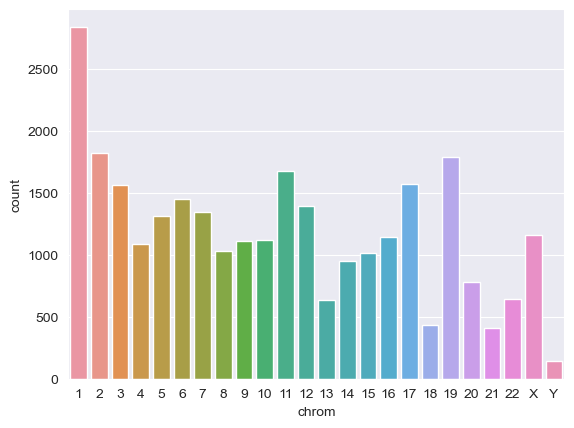

In [26]:
sns.barplot(data=df_count_genes, x='chrom', y='count')

In [27]:
df_count_genes['log2_count'] = df_count_genes['count'].map(math.log2)
df_count_genes

,chrom,count,log2_count
0,1,2842,11.472691
1,2,1821,10.830515
2,3,1563,10.610102
3,4,1089,10.088788
4,5,1314,10.359750
5,6,1454,10.505812
6,7,1349,10.397675
7,8,1033,10.012625
8,9,1112,10.118941
9,10,1116,10.124121


<AxesSubplot: xlabel='chrom', ylabel='log2_count'>

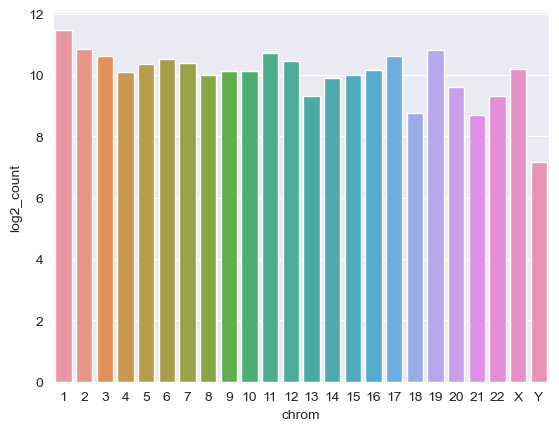

In [28]:
sns.barplot(data=df_count_genes, x='chrom', y='log2_count')

### plot gene distribution per chromsome

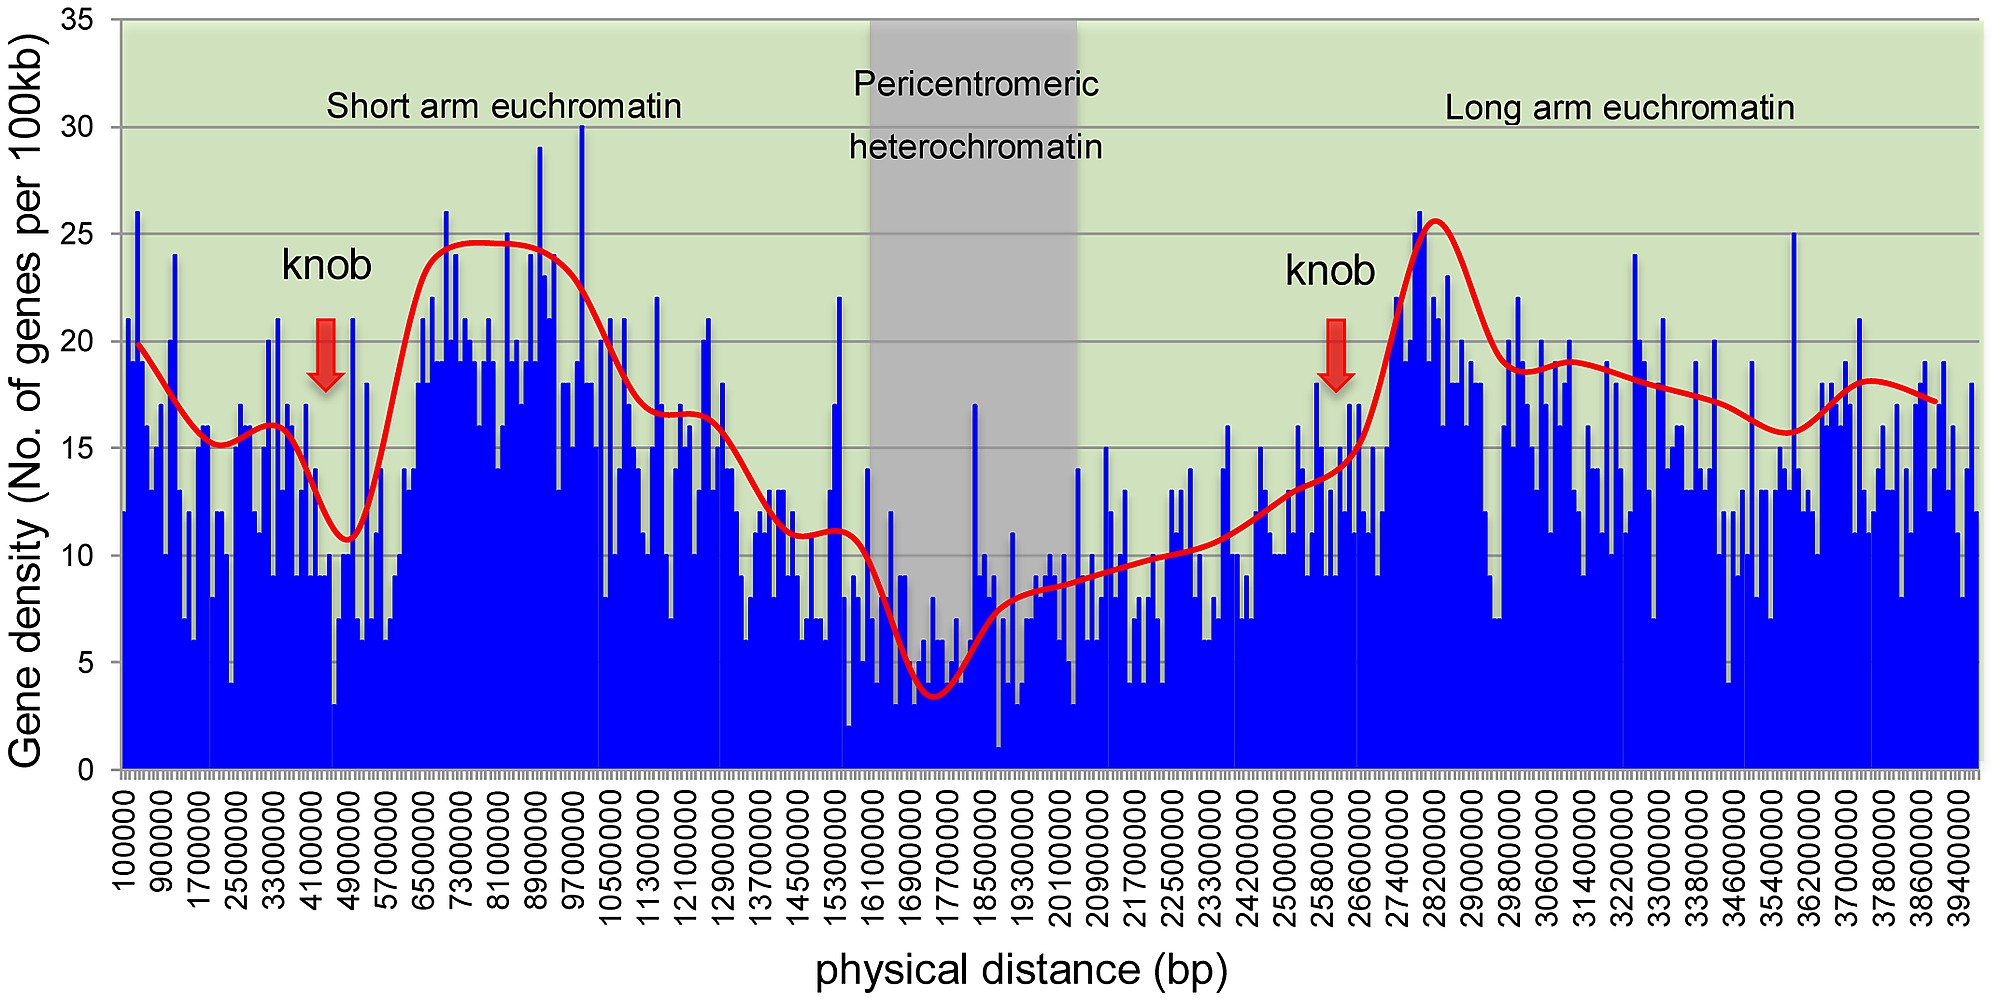

In [29]:
df.isna().sum()

#bin            0
name            0
chrom           0
strand          0
txStart         0
txEnd           0
cdsStart        0
cdsEnd          0
exonCount       0
exonStarts      0
exonEnds        0
score           0
name2           0
cdsStartStat    0
cdsEndStat      0
exonFrames      0
dtype: int64

In [30]:
df.head()

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,"
5,1,NM_001042681,1,-,8352403,8817640,8355086,8656297,23,"8352403,8355418,8356099,8358195,8359763,836011...","8355120,8355599,8356246,8358916,8359986,836149...",0,RERE,cmpl,cmpl,"2,1,1,0,2,0,0,0,1,1,0,0,0,2,0,2,2,1,0,0,1,0,-1,"
7,1,NR_038261,1,-,41847188,42035934,42035934,42035934,4,"41847188,41848870,41918412,42035806,","41848445,41849089,41918524,42035934,",0,HIVEP3,unk,unk,"-1,-1,-1,-1,"
9,1,NM_001281956,1,-,33513997,34165230,33519517,34165097,71,"33513997,33519464,33519811,33521462,33523306,3...","33516570,33519677,33519950,33521550,33523419,3...",0,CSMD2,cmpl,cmpl,"-1,2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1..."


In [31]:
df['txEnd'].max() / 1_000_000

248.919146

In [33]:
df['category'] = pd.cut(x=df['txEnd'] / 1_000_000, bins=range(0, 250, 1))
df

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames,category
0,0,NM_000299,1,+,201283451,201332993,201283702,201328836,15,"201283451,201293941,201313165,201316552,201317...","201283904,201294045,201313560,201316697,201317...",0,PKP1,cmpl,cmpl,"0,1,0,2,0,1,2,2,0,0,0,1,2,0,-1,","(201, 202]"
1,0,NM_001276351,1,-,67092165,67134970,67093004,67127240,8,"67092165,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,","(67, 68]"
5,1,NM_001042681,1,-,8352403,8817640,8355086,8656297,23,"8352403,8355418,8356099,8358195,8359763,836011...","8355120,8355599,8356246,8358916,8359986,836149...",0,RERE,cmpl,cmpl,"2,1,1,0,2,0,0,0,1,1,0,0,0,2,0,2,2,1,0,0,1,0,-1,","(8, 9]"
7,1,NR_038261,1,-,41847188,42035934,42035934,42035934,4,"41847188,41848870,41918412,42035806,","41848445,41849089,41918524,42035934,",0,HIVEP3,unk,unk,"-1,-1,-1,-1,","(42, 43]"
9,1,NM_001281956,1,-,33513997,34165230,33519517,34165097,71,"33513997,33519464,33519811,33521462,33523306,3...","33516570,33519677,33519950,33521550,33523419,3...",0,CSMD2,cmpl,cmpl,"-1,2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1...","(34, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78336,971,NM_012324,22,+,50600792,50613976,50600818,50610779,12,"50600792,50601788,50603222,50603625,50603840,5...","50600883,50601894,50603498,50603719,50605064,5...",0,MAPK8IP2,cmpl,cmpl,"0,2,0,0,1,1,2,1,0,0,2,2,","(50, 51]"
78337,972,NM_001350007,22,-,50767505,50783636,50768775,50782294,10,"50767505,50769040,50769454,50769904,50775771,5...","50768874,50769124,50769549,50770016,50775851,5...",0,RABL2B,cmpl,cmpl,"0,0,1,0,1,2,2,0,-1,-1,","(50, 51]"
78350,972,NR_134637,22,-,50735828,50738169,50738169,50738169,2,"50735828,50737389,","50737104,50738169,",0,LOC105373100,unk,unk,"-1,-1,","(50, 51]"
78351,972,NR_026981,22,+,50757085,50799637,50799637,50799637,4,"50757085,50783119,50785172,50798654,","50757326,50783294,50785293,50799637,",0,RPL23AP82,unk,unk,"-1,-1,-1,-1,","(50, 51]"


In [34]:
df_cut = df.groupby(['chrom', 'category'])['name2'].count().to_frame().reset_index()
df_cut.rename(columns={'name2': 'count'}, inplace=True)
df_cut

,chrom,category,count
0,1,"(0, 1]",36
1,1,"(1, 2]",57
2,1,"(2, 3]",21
3,1,"(3, 4]",20
4,1,"(4, 5]",3
...,...,...,...
5971,Y,"(244, 245]",0
5972,Y,"(245, 246]",0
5973,Y,"(246, 247]",0
5974,Y,"(247, 248]",0


In [35]:
df_cut['category'] = df_cut['category'].map(lambda x: int(str(x).replace(']', '').split(',')[-1])).astype(int)
df_cut

,chrom,category,count
0,1,1,36
1,1,2,57
2,1,3,21
3,1,4,20
4,1,5,3
...,...,...,...
5971,Y,245,0
5972,Y,246,0
5973,Y,247,0
5974,Y,248,0


In [36]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chrom     5976 non-null   object
 1   category  5976 non-null   int64 
 2   count     5976 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 140.2+ KB


In [37]:
df_cut.isna().sum()

chrom       0
category    0
count       0
dtype: int64

#### use R ggplot2
```
pip install rpy2
```

In [38]:
%load_ext rpy2.ipython

In [39]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [40]:
%%R -i df_cut
# typeof(df_cut)
df_cut = tibble(df_cut)
head(df_cut)

# A tibble: 6 × 3
  chrom category count
  <chr>    <int> <int>
1 1            1    36
2 1            2    57
3 1            3    21
4 1            4    20
5 1            5     3
6 1            6     2


/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


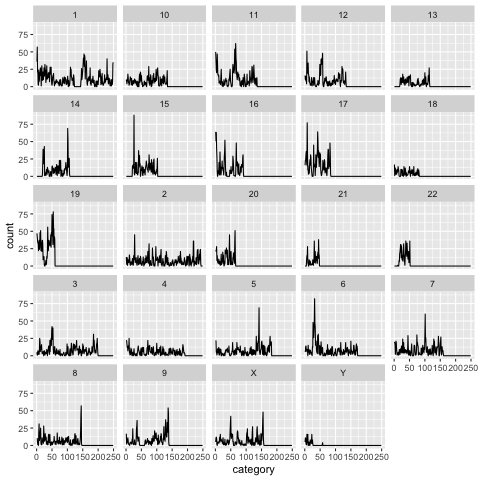

In [41]:
%%R
g = ggplot(data=df_cut) + geom_line(aes(x=category, y=count)) + facet_wrap(~chrom, scales='fixed')
g

In [42]:
%%R
ggsave('2022-11-07_distribution_of_gen_density_per_chromsome.pdf', g, height=10, width=20)

#### python lets\_plot
```
pip install lets_plot  # jetbrains
```

In [43]:
from lets_plot import *

LetsPlot.setup_html()

In [44]:
g = ggplot(data=df_cut) + geom_line(aes(x='category', y='count')) + facet_wrap('chrom', scales='fixed')
g

In [45]:
ggsave(g, '2022-11-07_distribution_of_gen_density_per_chromsome.html', path='.', iframe=False)
# ggsave?

'/Users/zhaohuanan/Desktop/课程文档/课上笔记本/project_3/2022-11-07_distribution_of_gen_density_per_chromsome.html'

### plot gene density per chromsome

```
hg38.fa.fai

samtools faidx hg38.fa
```

In [46]:
df_count_genes

,chrom,count,log2_count
0,1,2842,11.472691
1,2,1821,10.830515
2,3,1563,10.610102
3,4,1089,10.088788
4,5,1314,10.359750
5,6,1454,10.505812
6,7,1349,10.397675
7,8,1033,10.012625
8,9,1112,10.118941
9,10,1116,10.124121


In [47]:
df_chrom_lens = pd.read_csv(
    'genome_ucsc_hg38.fa.fai',
    header=None,
    index_col=None,
    sep='\t',
    usecols=[0, 1],
    names=['chrom', 'length']
)
df_chrom_lens['chrom'] = df_chrom_lens['chrom'].str[3:]
df_chrom_lens = df_chrom_lens[df_chrom_lens['chrom'].map(lambda x: x in aim_chroms)]
df_chrom_lens

,chrom,length
0,1,248956422
1,2,242193529
2,3,198295559
3,4,190214555
4,5,181538259
5,6,170805979
6,7,159345973
7,8,145138636
8,9,138394717
9,10,133797422


In [48]:
print(df_count_genes.head())
print(df_chrom_lens.head())
df_density = pd.merge(left=df_count_genes, right=df_chrom_lens, on='chrom', how='left')
df_density

  chrom  count  log2_count
0     1   2842   11.472691
1     2   1821   10.830515
2     3   1563   10.610102
3     4   1089   10.088788
4     5   1314   10.359750
  chrom     length
0     1  248956422
1     2  242193529
2     3  198295559
3     4  190214555
4     5  181538259


,chrom,count,log2_count,length
0,1,2842,11.472691,248956422
1,2,1821,10.830515,242193529
2,3,1563,10.610102,198295559
3,4,1089,10.088788,190214555
4,5,1314,10.359750,181538259
5,6,1454,10.505812,170805979
6,7,1349,10.397675,159345973
7,8,1033,10.012625,145138636
8,9,1112,10.118941,138394717
9,10,1116,10.124121,133797422


In [49]:
df_density['density'] = df_density['count'] / df_density['length'] * 1_000_000
# density: count per Mpbs
df_density

,chrom,count,log2_count,length,density
0,1,2842,11.472691,248956422,11.415652
1,2,1821,10.830515,242193529,7.518781
2,3,1563,10.610102,198295559,7.882173
3,4,1089,10.088788,190214555,5.725114
4,5,1314,10.359750,181538259,7.238144
5,6,1454,10.505812,170805979,8.512583
6,7,1349,10.397675,159345973,8.465856
7,8,1033,10.012625,145138636,7.117333
8,9,1112,10.118941,138394717,8.034989
9,10,1116,10.124121,133797422,8.340968


<AxesSubplot: xlabel='chrom', ylabel='density'>

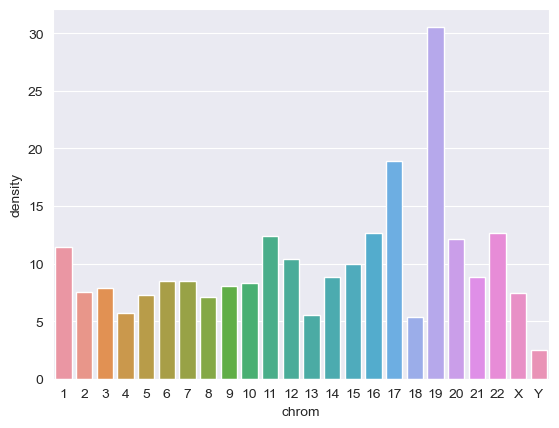

In [50]:
sns.barplot(data=df_density, x='chrom', y='density')

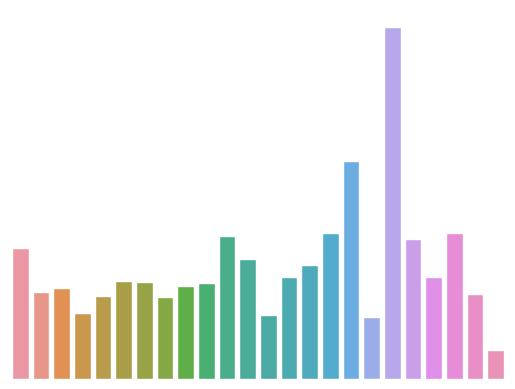

In [51]:
ax = sns.barplot(data=df_density, x='chrom', y='density')
# dir(ax)
# ax.get_xticklines()
ax.set_axis_off()

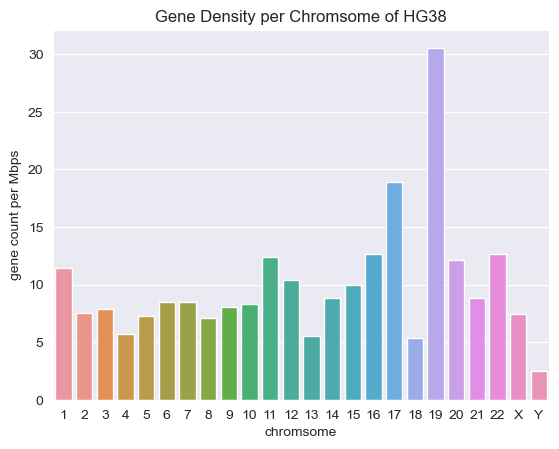

In [52]:
ax = sns.barplot(data=df_density, x='chrom', y='density')
ax.axes.set_xlabel('chromsome')
ax.axes.set_ylabel('gene count per Mbps')
ax.set_title('Gene Density per Chromsome of HG38')


plt.savefig('2022-11-07_gene_density_per_chromsome.pdf')

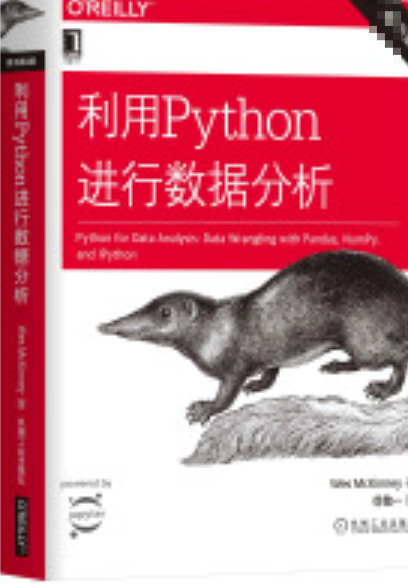

In [53]:
%%R
head(df_cut)

# A tibble: 6 × 3
  chrom category count
  <chr>    <int> <int>
1 1            1    36
2 1            2    57
3 1            3    21
4 1            4    20
5 1            5     3
6 1            6     2


In [54]:
%%R
df_cut %>% group_by(chrom) %>% summarize(total=sum(count))

# A tibble: 24 × 2
   chrom total
   <chr> <int>
 1 1      2842
 2 10     1116
 3 11     1675
 4 12     1391
 5 13      632
 6 14      949
 7 15     1012
 8 16     1144
 9 17     1574
10 18      430
# … with 14 more rows


## 读取 GenBank 文件并完成计算
- genbank 文件下载
- load genbank文件 (Biopython)
- gene 的 feature 进行基本统计 (CDS, exon)
    - min
    - max
    - mean
    - median

### 文件下载

In [68]:
# Ensembl (per Chromsome)
# RefSeq (per transcript)

### load genbank file

In [67]:
ensembl_gb = "genbank/Homo_sapiens.hg38.Ensembl_GRCH38.108.gbff.gz"
test_ensembl_gb = "genbank/Homo_sapiens.GRCh38.108.chromosome.18.dat.gz"
# test_ensembl_gb2 = "genbank/Homo_sapiens.GRCh38.108.chromosome.MT.dat.gz"
refseq_gb = "genbank/Homo_sapiens.hg38.RefSeq_GRCH38.20220412.gbff.gz"

In [63]:
# pip/conda/mamba install biopython

In [64]:
from Bio import SeqIO
from Bio import __version__ as biov

biov

'1.79'

In [65]:
# test_ensembl_gb

In [66]:
SeqIO.parse?

Signature: SeqIO.parse(handle, format, alphabet=None)
Docstring:
Turn a sequence file into an iterator returning SeqRecords.

Arguments:
 - handle   - handle to the file, or the filename as a string
   (note older versions of Biopython only took a handle).
 - format   - lower case string describing the file format.
 - alphabet - no longer used, should be None.

Typical usage, opening a file to read in, and looping over the record(s):

>>> from Bio import SeqIO
>>> filename = "Fasta/sweetpea.nu"
>>> for record in SeqIO.parse(filename, "fasta"):
...    print("ID %s" % record.id)
...    print("Sequence length %i" % len(record))
ID gi|3176602|gb|U78617.1|LOU78617
Sequence length 309

For lazy-loading file formats such as twobit, for which the file contents
is read on demand only, ensure that the file remains open while extracting
sequence data.

If you have a string 'data' containing the file contents, you must
first turn this into a handle in order to parse it:

>>> data = ">Alpha\nACCGGA

In [69]:
test_ensembl_gb

'genbank/Homo_sapiens.GRCh38.108.chromosome.18.dat.gz'

In [70]:
# filename.gz wrong
for record in SeqIO.parse(test_ensembl_gb, format='genbank'):
    print(record.id)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [71]:
test_ensembl_gb[:-3]

'genbank/Homo_sapiens.GRCh38.108.chromosome.18.dat'

In [72]:
# filename ok
for record in SeqIO.parse(test_ensembl_gb[:-3], format='genbank'):
    print(record.id)

18GRCh38


In [75]:
for record in SeqIO.parse(
        gzip.open(test_ensembl_gb, 'rt'),
        format='genbank'):
    print(record.id)

18GRCh38


In [76]:
ensembl_gb

'genbank/Homo_sapiens.hg38.Ensembl_GRCH38.108.gbff.gz'

In [77]:
for record in SeqIO.parse(
        gzip.open(ensembl_gb, 'rt'),
        format='genbank'):
    print(record.id)

1GRCh38
2GRCh38
3GRCh38
4GRCh38
5GRCh38
6GRCh38
7GRCh38
8GRCh38
9GRCh38
10GRCh38
11GRCh38
12GRCh38
13GRCh38
14GRCh38
15GRCh38
16GRCh38
17GRCh38
18GRCh38
19GRCh38
20GRCh38
21GRCh38
22GRCh38
XGRCh38
chromosome:GRCh38:Y:2781480:56887902:1
chromosome:GRCh38:Y:1:10000:1
chromosome:GRCh38:Y:57217416:57227415:1
MTGRCh38


In [78]:
for record in SeqIO.parse(
        gzip.open(test_ensembl_gb, 'rt'),
        format='genbank'):
    print(record.id)

18GRCh38


In [80]:
record

SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN'), id='18GRCh38', name='18', description='Homo sapiens chromosome 18 GRCh38 full sequence 1..80373285 reannotated via EnsEMBL', dbxrefs=[])

In [81]:
type(record)

Bio.SeqRecord.SeqRecord

In [85]:
record.seq[:10]

Seq('NNNNNNNNNN')

In [84]:
len(record.seq[:10])

10

In [86]:
record.seq

Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')

In [87]:
len(record.seq)

80373285

In [88]:
len(record)

80373285

In [89]:
record.id

'18GRCh38'

In [90]:
record.name

'18'

In [91]:
record.description

'Homo sapiens chromosome 18 GRCh38 full sequence 1..80373285 reannotated via EnsEMBL'

In [92]:
record[0]

'N'

In [93]:
record.seq[0]

'N'

In [94]:
dir(record)
# record.__dir__()

['__add__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__le___',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_per_letter_annotations',
 '_seq',
 '_set_per_letter_annotations',
 '_set_seq',
 'annotations',
 'dbxrefs',
 'description',
 'features',
 'format',
 'id',
 'letter_annotations',
 'lower',
 'name',
 'reverse_complement',
 'seq',
 'translate',
 'upper']

In [98]:
# record.features

In [99]:
record.features[0]

SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(80373285), strand=1), type='source')

In [101]:
record.features[1]

SeqFeature(FeatureLocation(ExactPosition(316736), ExactPosition(500722), strand=-1), type='gene')

In [102]:
record.features[1].id

'<unknown id>'

In [103]:
record.features[10]

SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(5084991), ExactPosition(5085228), strand=1), FeatureLocation(ExactPosition(5095545), ExactPosition(5095815), strand=1)], 'join'), type='misc_RNA', location_operator='join')

In [104]:
len(record.features[10])

507

In [105]:
record.features[100]

SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(5159331), ExactPosition(5159404), strand=1), FeatureLocation(ExactPosition(5163680), ExactPosition(5163797), strand=1), FeatureLocation(ExactPosition(5170669), ExactPosition(5171026), strand=1)], 'join'), type='misc_RNA', location_operator='join')

In [106]:
record.features[1000]

SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(20954782), ExactPosition(20954870), strand=-1), FeatureLocation(ExactPosition(20953573), ExactPosition(20953785), strand=-1)], 'join'), type='CDS', location_operator='join')

In [107]:
len(record.features[1000])

300

#### use one chromsome (chr18)

In [108]:
record.features[1000].type

'CDS'

In [109]:
# CDS misc_RNA mRNA exon ....

In [110]:
aim_features = ('CDS', 'exon')

dt_features_length = {k: [] for k in aim_features}
dt_features_length

{'CDS': [], 'exon': []}

In [123]:
# one, record (chr18)
for idx, feature in enumerate(record.features):
    # print(idx, feature.type)

    # if idx >= 100:
    #     break

    if feature.type in aim_features:
        length = len(feature)
        dt_features_length[feature.type].append(length)

In [128]:
dt_features_length['CDS'][:3]

[2229, 300, 867]

In [130]:
len(dt_features_length['CDS'])

5793

In [127]:
len(dt_features_length['exon'])

41997

In [131]:
dt_summarize = {k: [] for k in aim_features}
dt_summarize

{'CDS': [], 'exon': []}

In [168]:
for feature, lengthes in dt_features_length.items():
    dt_summarize[feature].extend(
        [
            max(lengthes),
            min(lengthes),
            mymean(lengthes),
            median(lengthes)
        ]
    )

In [169]:
dt_summarize

{'CDS': [10002, 11, 1166.8448127049887, 675],
 'exon': [32994, 1, 390.4377455532538, 154]}

In [174]:
df_summarize = pd.DataFrame(dt_summarize).T
df_summarize.columns = ['max', 'min', 'mean', 'median']
df_summarize

,max,min,mean,median
CDS,10002.0,11.0,1166.844813,675.0
exon,32994.0,1.0,390.437746,154.0


#### use all the genome

In [175]:
aim_features = ('CDS', 'exon')
dt_features_length = {k: [] for k in aim_features}

In [176]:
for record in SeqIO.parse(
        gzip.open(ensembl_gb, 'rt'),
        format='genbank'):
    print(record.id, record.name)

    for feature in record.features:
        if feature.type in aim_features:
            length = len(feature)
            dt_features_length[feature.type].append(length)

1GRCh38 1
2GRCh38 2
3GRCh38 3
4GRCh38 4
5GRCh38 5
6GRCh38 6
7GRCh38 7
8GRCh38 8
9GRCh38 9
10GRCh38 10
11GRCh38 11
12GRCh38 12
13GRCh38 13
14GRCh38 14
15GRCh38 15
16GRCh38 16
17GRCh38 17
18GRCh38 18
19GRCh38 19
20GRCh38 20
21GRCh38 21
22GRCh38 22
XGRCh38 X
chromosome:GRCh38:Y:2781480:56887902:1 Y
chromosome:GRCh38:Y:1:10000:1 Y
chromosome:GRCh38:Y:57217416:57227415:1 Y
MTGRCh38 MT


In [180]:
dt_summarize = {k: [] for k in aim_features}
dt_summarize

{'CDS': [], 'exon': []}

In [181]:
for feature, lengthes in dt_features_length.items():
    dt_summarize[feature].extend(
        [
            max(lengthes),
            min(lengthes),
            mymean(lengthes),
            median(lengthes)
        ]
    )

In [182]:
df_summarize = pd.DataFrame(dt_summarize).T
df_summarize.columns = ['max', 'min', 'mean', 'median']
df_summarize

,max,min,mean,median
CDS,107976.0,3.0,1187.371888,744.0
exon,347300.0,1.0,361.551463,148.0
